In [1]:
from PIL import Image
import numpy as np
import tensorflow as tf
from prediction import predict_class
import matplotlib.pyplot as plt
import os

In [2]:
# Function to preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))
    image = np.array(image)
    image = np.expand_dims(image, axis=0)  # Add a batch dimension
    image = image.astype('float32')
    image /= 255.0
    return image

In [3]:
# Function to predict real or fake
def predict_real_or_fake(image_path):
    image = preprocess_image(image_path)
    prediction = predict_class(image_path)
    if prediction >= 0.5:
        result = "Real"
    else:
        result = "Fake"
    return result

In [4]:
# Function to display the image and result
def display_image_with_result(image_path):
    image = Image.open(image_path)
    result = predict_real_or_fake(image_path)
    plt.imshow(image, cmap='gray')
    plt.title(f"Prediction: {result}")
    plt.axis('off')
    plt.show()

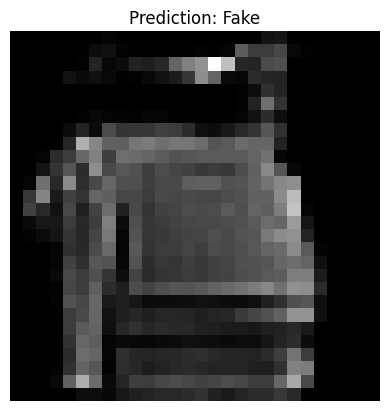

In [5]:
# Load the trained CNN model from the h5 file
model = tf.keras.models.load_model('Trained_Cnn_Model_4.h5')

# Example usage
image_path = 'fake_image_46.png'

display_image_with_result(image_path)